# What about colour? 

All of the arrays we have encountered [so far](0_images_as_numpy_arrays) contain just one value at each array pixel location. This page will look at image arrays with more complex shapes, and show how this can encode colour information, giving us beautiful colour images, like this one:

![](images/xenomorph.png)
(Image from [here](https://static1.srcdn.com/wordpress/wp-content/uploads/2019/07/Xenomorph-from-the-Alien-franchise.jpg))

First, some library imports:

In [1]:
# Library imports.
import numpy as np
import matplotlib.pyplot as plt

# Set 'gray' as the default colormap.
plt.rcParams['image.cmap'] = 'gray'

# Import a custom function to give hints for some exercises.
from hints import hint_corrupted_camera

Below, we create some low-resolution 2-D image arrays:

In [2]:
# A two-dimensional numpy array of 1's and 0's.
two_D_ones_and_zeros = np.array([[1, 0,], 
                                 [0, 1,]],
                                 dtype=float)

# A two dimensional numpy array of numbers between 0 and 10.
two_D_other_integers = np.array([[0, 10], 
                                 [5, 3]],
                                 dtype=float)

# Another image array.
smiley = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 1, 0],
                   [0, 1, 1, 0, 0, 1, 1, 0],
                   [0, 0, 1, 1, 1, 1, 0, 0],
                   [0, 0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0]],
                 dtype=float)

In our humble `two_D_ones_and_zeros` image array, each pixel is either a 1 or 0 in the `float64` `dtype`:

[[1. 0.]
 [0. 1.]]


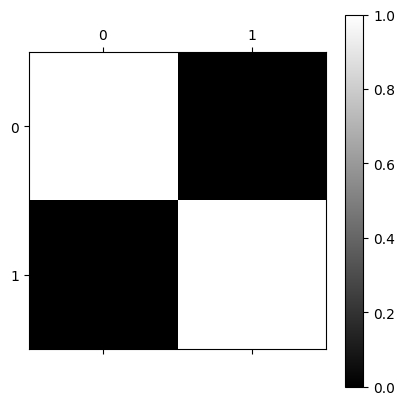

In [3]:
# Show the array, via NumPy, then plot.
print(two_D_ones_and_zeros)
plt.matshow(two_D_ones_and_zeros)
plt.colorbar();

In [4]:
two_D_ones_and_zeros.dtype

dtype('float64')

Conversely, the array `two_D_other_integers` contains different integer values. Note that, though the *numbers* themselves are integers, they are represent by NumPy as `float64` values:

[[ 0. 10.]
 [ 5.  3.]]


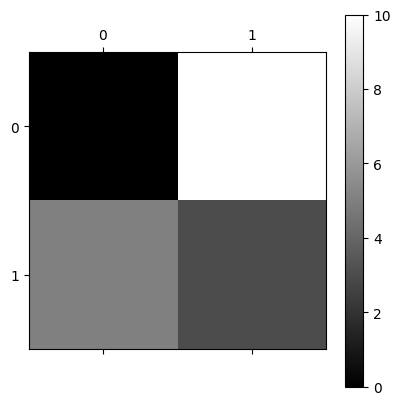

In [5]:
# Another image from earlier.
print(two_D_other_integers)
plt.matshow(two_D_other_integers)
plt.colorbar();

The first image - with black and white squares only, no grey - is a *binary image*. This is an image where each array pixel contains only one of two values. In this case the two values are 0 or 1, with 0 corresponding to black pixels and 1 corresponding to white pixels.

The second image - black, white and grey squares - is a *monochrome image*. This image contains more than two unique values; it has black pixels (lowest pixel values, 0), white pixels (highest pixel values, 1), and grey pixels (intermediate pixel values, > 0 but < 1).

**This is important:** for two-dimensional arrays like these each array pixel has a *single number* in the image array. Because of this, we can refer to both of these arrays as *single-channel image arrays*. Each individual array pixel value determines the *intensity* of that pixel, e.g. the brightness or darkness of that pixel. 

Each colourmap (`viridis` and `gray`) maps each single-valued pixel intensity to a gradient of colours/shades. This is a black-grey-white gradient for the `gray` colourmap and a purple-yellow gradient for the `viridis` colourmap. Technically speaking, for single-channel image arrays, the intensity values only convey black-white-gray information - the `viridis` colourmap merely *translates* this black-grey-white information into a coloured presentation for the purposes of display. 

What `viridis` is doing is called [*pseudo-colouring*](https://www.spiedigitallibrary.org/conference-proceedings-of-spie/0048/0000/Digital-Image-Processing-With-Pseudo-Color/10.1117/12.954071.short) - it is mapping black-grey-white information to display colours. The plot below show's both arrays, with both colourmaps, for comparison:

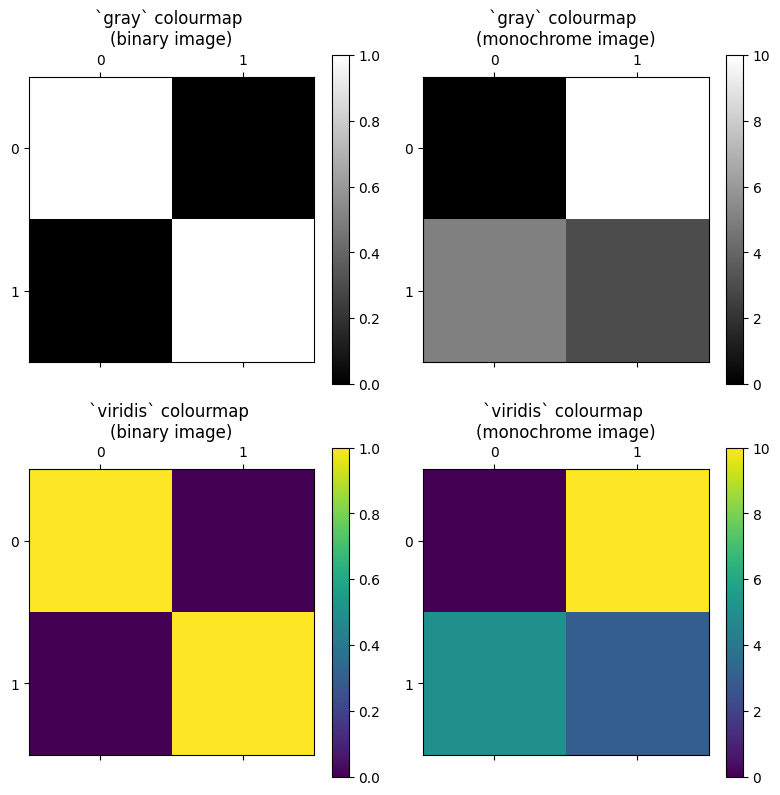

In [6]:
# An image from earlier (using the `grey` colourmap)
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.matshow(two_D_ones_and_zeros,
            fignum=0)
plt.title('`gray` colourmap \n(binary image)')
plt.colorbar()
plt.subplot(2, 2, 2)
# Another image from earlier (using the `grey` colourmap)
plt.matshow(two_D_other_integers,
            fignum=0)
plt.title('`gray` colourmap \n(monochrome image)')
plt.colorbar();

# Show with pseudocolour using the `viridis` colourmap
plt.subplot(2, 2, 3)
plt.matshow(two_D_ones_and_zeros,
            cmap='viridis',
            fignum=0)
plt.title('`viridis` colourmap \n(binary image)')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.matshow(two_D_other_integers, 
            cmap='viridis',
            fignum=0)
plt.title('`viridis` colourmap \n(monochrome image)')
plt.colorbar()
plt.tight_layout();

We can say then, that the plots on the bottom row are *displayed using pseudo-colour*. The original image arrays only contain black-white-grey information in the pixel intensity values; they do not contain *true colour* information. **This will be true of any two-dimensional image array**, and both of these image arrays are two-dimensional:

In [7]:
# Show the dimensionality of our binary image array.
two_D_ones_and_zeros.shape

(2, 2)

In [8]:
# Show the dimensionality of our greyscale image array.
two_D_other_integers.shape

(2, 2)

An image which has what we will call *true colour* contains information **in each array pixel about more than just *intensity* - it also contains information about *colour*.**  So, to hammer this point home: greyscale and binary images displayed with the `viridis` colourmap do not contain true colour information in their array pixel values. Instead Matplotlib is *displaying* binary and greyscale information using colours. To introduce true colour into the image, we need a spooky third dimension... 

Sounds Sci-Fi! But what does it mean?

Let's focus on our lowly 4-pixel binary array (4 *array pixels*, that is):

In [9]:
# Show the array.
two_D_ones_and_zeros

array([[1., 0.],
       [0., 1.]])

Let's visualise this array with Matplotlib:

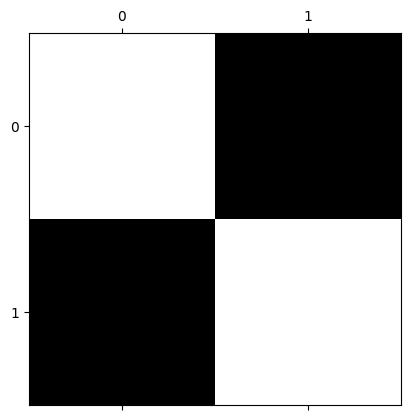

In [10]:
# Our 4-pixel, binary array.
plt.matshow(two_D_ones_and_zeros);

Now, picture this array as physical object, like a tray, standing on one side, in physical space:

![](images/one_slice.png)

Now, imagine "stacking" multiple copies of this array, and standing them in front of each other, like this:

![](images/two_slice.png)

Let's refer to each of these objects as a *slice*. So we have two slices in the image above, one in the foreground, and one in the background.

We can do the equivalent of this three-dimensional stacking - to our actual binary arrays - using the helpfully named `np.stack()` function. We can use `np.stack()` to - as the name implies - stack two 2D arrays into a 3D array, like in the image shown above. To do this, we stack over the third axis using the argument `axis=2`. This adds new arrays to the stack along the third dimension, when we count the dimensions from 0, as we do in Python indexing:

In [11]:
# Stack the arrays in the third dimension.
three_D_stack_array = np.stack([two_D_ones_and_zeros,
                                two_D_ones_and_zeros],
                                axis=2)
three_D_stack_array 

array([[[1., 1.],
        [0., 0.]],

       [[0., 0.],
        [1., 1.]]])

At first glance, the "raw" output from Numpy may not look like the "stacked" slices in the image above, but please bear with us.
Our 3-D stacked array is of the right shape:

In [12]:
three_D_stack_array.shape

(2, 2, 2)

We can refer to each dimension in the `shape` of `(2, 2, 2)` as `(x, y, z)`. These dimensions map to the image as shown below:

![](images/two_slice_dims.png)

We can read this shape as "two slices, each with two rows and two columns", which now clearly corresponds to the image.

Imagine being in the same physical space as these slices. Starting at the front of the image, you begin walking toward the first slice (nearest to the reader, in the foreground), then past it toward the second slice (furthest from the reader, in the background). So, in this imaginative exercise, you are walking along the $z$ dimension.

We can use indexing operations to create the experience of this walk, in "Python space". Because we are dealing with a three-dimensional array we use three elements for indexing, separated by commas. The first element is for rows, the second for columns, and the third for slices. We can retrieve the first slice using:

In [13]:
# Get the first 2D slice from the 3D image.
three_D_stack_array[:, :, 0]

array([[1., 0.],
       [0., 1.]])

And we can grab the second slice using:

In [14]:
# Get the second 2D slice from the 3D image.
three_D_stack_array[:, :, 1]

array([[1., 0.],
       [0., 1.]])

The image below shows these indexing operations represented in three-dimensional space:

![](images/two_slice_annotated.png)

So far we have two slices in the third dimension. We can easily add a third slice, using `np.stack()`:

In [15]:
# Add a third slice.
three_D_stack_array = np.stack([two_D_ones_and_zeros,
                                two_D_ones_and_zeros,
                                two_D_ones_and_zeros], # Add a third slice in the third dimension.
                                axis=2)
three_D_stack_array

array([[[1., 1., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 1., 1.]]])

The `shape` of this new array now reads as "three slices, each with two rows and two columns":

In [16]:
three_D_stack_array.shape

(2, 2, 3)

We can visualise this new array, in the same three-dimensional space:

![](images/three_slice.png)

Again, we can use indexing to "walk" through the slices, along the $z$ dimension:

In [17]:
# First 2-D slice of the stack.
three_D_stack_array[:, :, 0]

array([[1., 0.],
       [0., 1.]])

In [18]:
# Second 2-D slice of the stack.
three_D_stack_array[:, :, 1]

array([[1., 0.],
       [0., 1.]])

In [19]:
# Third 2-D slice of the stack.
three_D_stack_array[:, :, 2]

array([[1., 0.],
       [0., 1.]])

![](images/three_slice_annotated.png)

So far we have visualised these slices using a similar graphic to depicting an individual slice using the `gray` Matplotlib colourmap. We can just as well visualise the slices using the numbers they contain:

![](images/three_slice_nums_only_annotated.png)

Remember, the actual numbers in each "slice" are of the `float64` `dtype` and so contain (empty) decimal places. However, we will show the numbers just as 0 or 1, to keep the image uncluttered. Above we said we wanted to introduce a third dimension to introduce "true" colour information into the image. Well, now we have three dimensions surely plotting our image will render a vibrantly coloured picture?

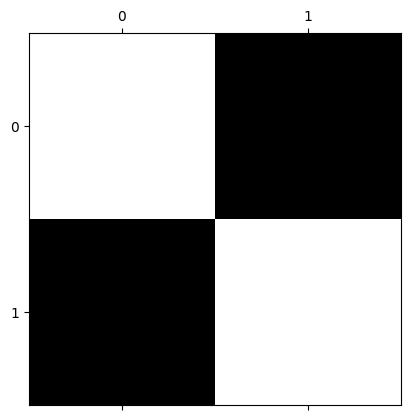

In [20]:
# Ooof...not what we wanted...
plt.matshow(three_D_stack_array);

Ok, that is not what we wanted - nothing has changed! Interestingly though, the 3-D image array still renders as a 2-D display image:

![](images/three_slice_all_1s.png)

What happens if we set every element, in every slice, to equal 0? To do this, first we create a 4-pixel array containing only 0's:

In [21]:
# Create a 4-pixel array containing only 0's.
two_D_zeros = two_D_ones_and_zeros * 0.

two_D_zeros

array([[0., 0.],
       [0., 0.]])

Then, we stack into three dimensions with `np.stack()`:

In [22]:
# Stack three of these arrays, making a 3-D array containing only 0's.
three_D_zeros = np.stack([two_D_zeros,
                          two_D_zeros, 
                          two_D_zeros],
                          axis=2)
three_D_zeros

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

We can visualise this array as:

![](images/three_slice_zeros.png)

Next, we plot with Matplotlib:

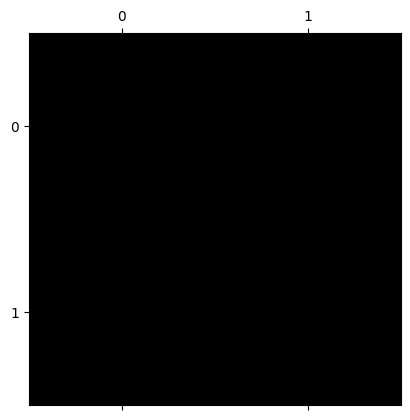

In [23]:
# Plot the 3-D array which contains only 0s.
plt.matshow(three_D_zeros);

Ok, so now we have a fully black 2-D display image, from our 3-D array which contains only 0's:

![](images/three_slice_zeros_visualised.png)

As an experiment, let's see what happens if put 1's on the diagonal in the *first slice only*. To do this, we will stack the `two_D_ones_and_zeros` array as the first slice, and `two_D_zeros` as the other two slices:

In [24]:
# Show the array (for the first slice).
two_D_ones_and_zeros

array([[1., 0.],
       [0., 1.]])

In [25]:
# Show the array (for the second and third slices).
two_D_zeros

array([[0., 0.],
       [0., 0.]])

In [26]:
three_D_stack_array_altered_first = np.stack([two_D_ones_and_zeros, # LOOK HERE!
                                              two_D_zeros, 
                                              two_D_zeros], 
                                              axis=2)
three_D_stack_array_altered_first 

array([[[1., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 0., 0.]]])

More intuitively visualised, our new three dimensional array looks like this:

![](images/three_slice_red.png)

You can see the values of 1 in the top left and bottom right elements of the first slice, all other elements are 0. Once more we can "walk" along the $z$ dimension, using indexing operations:

In [27]:
# First 2-D slice of the stack.
three_D_stack_array_altered_first[:, :, 0]

array([[1., 0.],
       [0., 1.]])

In [28]:
# Second 2-D slice of the stack.
three_D_stack_array_altered_first[:, :, 1]

array([[0., 0.],
       [0., 0.]])

In [29]:
# Third 2-D slice of the stack.
three_D_stack_array_altered_first[:, :, 2]

array([[0., 0.],
       [0., 0.]])

Now let's see what happens if we plot this new 3-D array using Matplotlib:

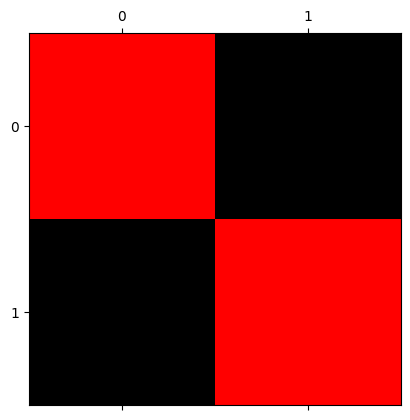

In [30]:
plt.matshow(three_D_stack_array_altered_first);

Great! We have now used the third dimension to introduce *true colour information* into our image array. We can visualise this process using the graphic below:

![](images/three_slice_red_visualised.png)

Just to clarify, again our *array image* is three-dimensional, but our *display image* - e.g. the image rendered/displayed by Matplotlib - is two-dimensional, like the visualisations we saw earlier. In virtue of being 3-D, the image array itself contains three values for each array pixel - with one value in each "slice" in the third dimension.

To produce this red and black square, we altered the *first slice* of the 3-D array, such that it contains 1's along its diagonal, but all other elements in the array are 0's.

The first slice of the third dimension - in our 3-D image array - controls the amount of red in the image. We can therefore (for now) call this slice the *red slice*. 

What happens if we alter only the *second slice* in the third dimension, so that only it contains 1's along its diagonal, and all other array elements equal 0?

In [31]:
three_D_stack_array_altered_second = np.stack([two_D_zeros, 
                                               two_D_ones_and_zeros, # LOOK HERE! Now we alter only the second slice.
                                               two_D_zeros], 
                                               axis=2)
three_D_stack_array_altered_second

array([[[0., 1., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 1., 0.]]])

We can visualise this new 3-D array as:

![](images/three_slice_green.png)

We can proceed with another "walk" through the image again, with the familiar indexing operations:

In [32]:
# First 2-D place of the stack.
three_D_stack_array_altered_second[:, :, 0]

array([[0., 0.],
       [0., 0.]])

In [33]:
# Second 2-D place of the stack.
three_D_stack_array_altered_second[:, :, 1]

array([[1., 0.],
       [0., 1.]])

In [34]:
# Third 2-D slice of the stack.
three_D_stack_array_altered_second[:, :, 2]

array([[0., 0.],
       [0., 0.]])

How does this 3-D array look when we visualise it with Matplotlib?

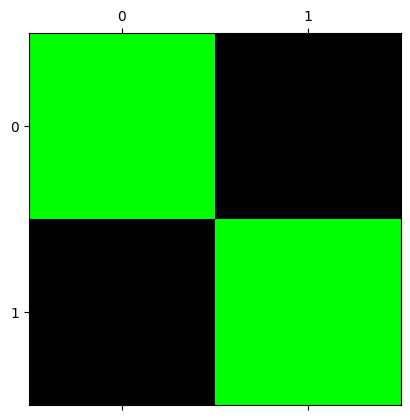

In [35]:
plt.matshow(three_D_stack_array_altered_second);

Here we have altered only the second slice, such that only it contains nonzero (1) values. We now see green squares in the display image:

![](images/three_slice_green_visualised.png)

Alterations to the second slice in the third dimension control the amount of green in the image - the second slice in the third dimension is therefore the *green slice*.

For completeness, let's change only the *third slice* in the third dimension:

In [36]:
three_D_stack_array_altered_third = np.stack([two_D_zeros,
                                              two_D_zeros, 
                                              two_D_ones_and_zeros ], # LOOK HERE!
                                              axis=2)
three_D_stack_array_altered_third

array([[[0., 0., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 1.]]])

Which gives us the following stacked slices:

![](images/three_slice_blue.png)

...and the following "walk" through the slices, via array indexing:

In [37]:
# First 2-D slice of the stack.
three_D_stack_array_altered_third[:, :, 0]

array([[0., 0.],
       [0., 0.]])

In [38]:
# Second 2-D slice of the stack.
three_D_stack_array_altered_third[:, :, 1]

array([[0., 0.],
       [0., 0.]])

In [39]:
# Third 2-D slice of the stack.
three_D_stack_array_altered_third[:, :, 2]

array([[1., 0.],
       [0., 1.]])

Finally, when plotted, we get:

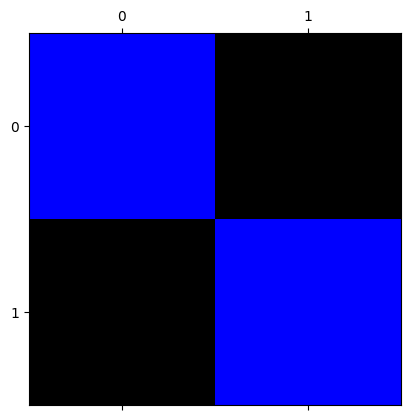

In [40]:
plt.matshow(three_D_stack_array_altered_third);

So, this has given us:

![](images/three_slice_blue_visualised.png)

What is happening here?

Recall that we referred to the 2-D arrays that we used at the start of this tutorial as *single-channel image arrays*? The 3-D arrays we just created are  *three-channel image arrays*. This means that each array pixel has three values, one in each slice of the 3-D stacks we created. You can think of each slice as being one *colour channel*. Each colour channel controls the amount of a specific colour in the image, depending on the values of the array pixels in that slice.

Using these three-channel arrays, when Matplotlib produces the a two-dimensional *display image* (e.g. the matrix with coloured squares along the diagonal and black squares elsewhere). However, behind this 2-D display image there are three slices in the third dimension, each with the same number of rows and columns as the final 2-D display image. Each pixel (e.g. each array element) in the display image gets its colour information from a mix of the corresponding elements in each slice in the 3-D image array.

As we have seen, the first slice is the red channel, the second slice is the green channel and the third slice is the blue channel. The intensities in each colour channel are *mixed* to produce the rendered 2-D image:

![](images/colour_channels_all.png)

Now, the way we have setup each 3-D array *is* mixing the colour channels, only by setting two of the slices to contain only 0's, we are essentially "switching off" that colour channel in the final mix (e.g. in the image displayed by Matplotlib). Other colours can be created using different blends of these primary colours (red, green, blue). For `float64` image data, you can think of 0 as meaning 0% and 1 as meaning 100%, 0.5 meaning 50% and so on. So a 1 in the red slice means 100% red is mixed in for that pixel, with the percentages from the other colour channels.

We can see this by choosing intensity values randomly for each colour channel. The function `np.random.uniform()` can supply us with three random decimal numbers between 0 and 1. Run the cell below a few times if you are using this tutorial interactively, to see the random draw a few times:

In [41]:
# Three random integers.
X1, X2, X3 = np.random.uniform(size=3).round(2)

print(f"X1 = {X1}\nX2 = {X2}\nX3 = {X3}")

X1 = 0.21
X2 = 0.58
X3 = 0.47


We will use the `X1` value from this random draw to set nonzero diagonal values in the red colour channel (e.g. in the *first* slice of the stack).

We will use the `X2` value from this random draw to set nonzero diagonal values in the green colour channel (e.g. in the *second* slice of the stack).

We will use the `X3` value from this random draw to set nonzero diagonal values in  the blue colour channel (e.g. in the *third* slice of the stack).

We will then view the resulting display image.

Again, if you are using this tutorial interactively, run the cell a few times to see multiple random mixes across the colour channels:

Red (X1) = 0.74
Green (X2) = 0.22
Blue (X3) = 0.71


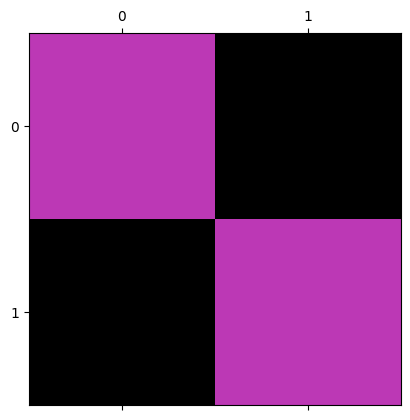

In [42]:
# Get three random integers between 0 and 255
X1, X2, X3 = np.random.uniform(size=3).round(2)

# Display the values of the random integers.
print(f"Red (X1) = {X1}\nGreen (X2) = {X2}\nBlue (X3) = {X3}")

# Create a 3-D stack, with the nonzero values in each slice set by the
# random integers.
three_D_stack_array_altered_blend= np.stack([two_D_ones_and_zeros * X1,
                                             two_D_ones_and_zeros * X2,
                                             two_D_ones_and_zeros * X3], 
                                             axis=2)
# Visualise the 3-D stack with Matplotlib
plt.matshow(three_D_stack_array_altered_blend);

So, each two-dimensional display image has a "hidden" three-dimensional array behind it. Each slice of the third dimension is a colour channel. The mix of values at a given element in each colour channel determins the colour of that pixel in the rendered image.

![](images/three_slice_algebraic_multi.png)

You can view lots of random mixes across the colour channels, as a grid of plots, by running the cell below:

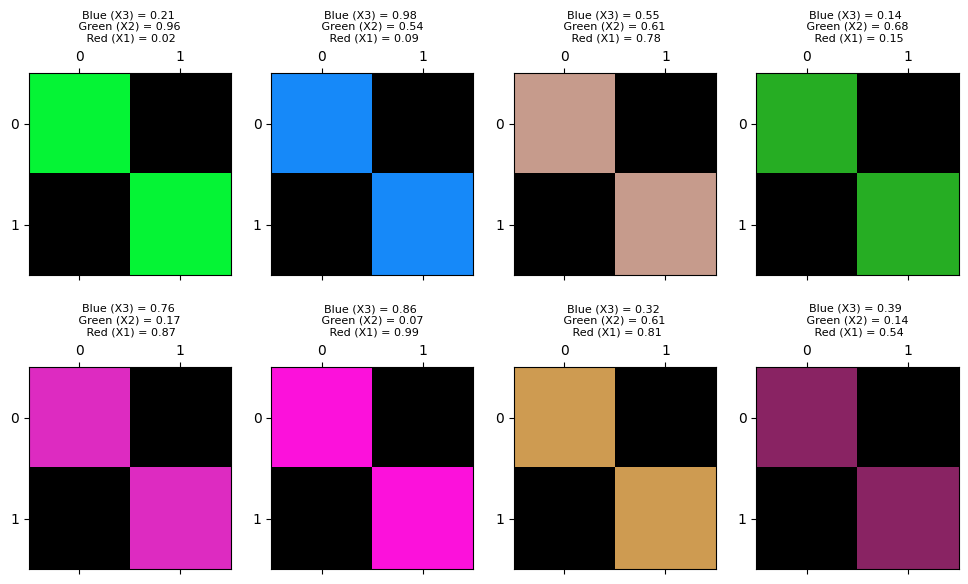

In [43]:
# A custom function to demonstrate many mixes of values across the three
# colour channels.
from random_colours import random_colour_array
random_colour_array(8, 8)

We have now completed our perilous expedition into the third dimension... We have seen that we can use 3-D arrays to encode *true colour* information e.g. where the image array itself contains colour information for each pixel, and where we are *not* just pseudocolouring greyscale information using `viridis`...

Let's investigate with a real colour image. We will introduce Scikit-image (`skimage`) in more detail on the [next page](2_skimage_intro), but for now we will again use the straightforwardly named `imread()` function to load an image from a file:

In [44]:
# Import the input/output module from skimage.
from skimage import io

# Load our image array.
coffee = io.imread("images/coffee.png")

# Show the "raw" array output.
coffee

array([[[ 21,  13,   8],
        [ 21,  13,   9],
        [ 20,  11,   8],
        ...,
        [228, 182, 138],
        [231, 185, 142],
        [228, 184, 140]],

       [[ 21,  13,   7],
        [ 21,  13,   9],
        [ 20,  14,   7],
        ...,
        [228, 182, 136],
        [231, 185, 139],
        [229, 183, 137]],

       [[ 21,  14,   7],
        [ 23,  13,  10],
        [ 20,  14,   9],
        ...,
        [228, 182, 136],
        [228, 184, 137],
        [229, 185, 138]],

       ...,

       [[189, 124,  77],
        [214, 155, 109],
        [197, 141, 100],
        ...,
        [165,  86,  37],
        [161,  82,  41],
        [143,  67,  29]],

       [[207, 148, 102],
        [201, 142,  99],
        [196, 140,  97],
        ...,
        [154,  74,  37],
        [147,  66,  33],
        [145,  65,  31]],

       [[197, 141, 100],
        [195, 137,  99],
        [193, 138,  98],
        ...,
        [158,  73,  38],
        [144,  64,  30],
        [143,  60,  29]]

The cell below defines a function to let us quickly view the attributes of any image array. You'll noticed that this function just uses NumPy attributes, given that we are representing images as nothing but NumPy arrays:

In [45]:
def show_attributes(img):

    print("Type:", type(img))
    print("dtype:", img.dtype)
    print("Shape:", img.shape)
    print("Max Pixel Value:", img.max().round(2))
    print("Min Pixel Value:", img.min().round(2))

In [46]:
# Inspect the attributes of the `coffee` image array.
show_attributes(coffee)

Type: <class 'numpy.ndarray'>
dtype: uint8
Shape: (400, 600, 3)
Max Pixel Value: 255
Min Pixel Value: 0


We can see that this image has three dimensions, with three slices in the third dimension. We are therefore dealing with *true colour* image with three colour channels. We can also see that the image array represents the most intense pixel values with the number 255, and the least intense values with the number 0, in each colour channel. The `dtype` is `uint8`, in contrast the `float64` `dtype` we have been using in our custom made low-resolution image arrays.

Let's view the image with `imshow()`:

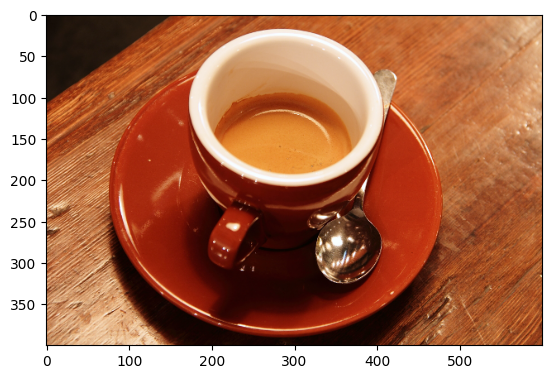

In [47]:
# Show the array.
plt.imshow(coffee);

Looks great! Though at the time of writing one of the authors is on their third coffee today...

Why is the highest pixel value in the `coffee` image the bizarrely specific integer value of 255? We will talk more about image data types [later](2_skimage_intro), but other values/`dtypes` would work here also, though they will affect which numbers represent the highest and lowest pixel values are. Here are some options:

0 - 1: where 0 is the least intense, 1 is the most intense (`float64`).

0 - 255: where 0 is the least intense, 255 is the most intense (`uint8`).

You will see both conventions in images you encounter "in the wild", and Sci-kit image supports both formats (as well as multiple other formats - see the table below). Neglecting to pay attention to `dtype` is a very common source of errors when dealing with image arrays, so keep track of it, and deliberately specify it as often as possible!

![](images/dtypes_skimage.png)

The plot below shows how to get the primary colours (red, green, blue) using both the `float64` and `unint8` convention for the maximum and minimum pixel values:

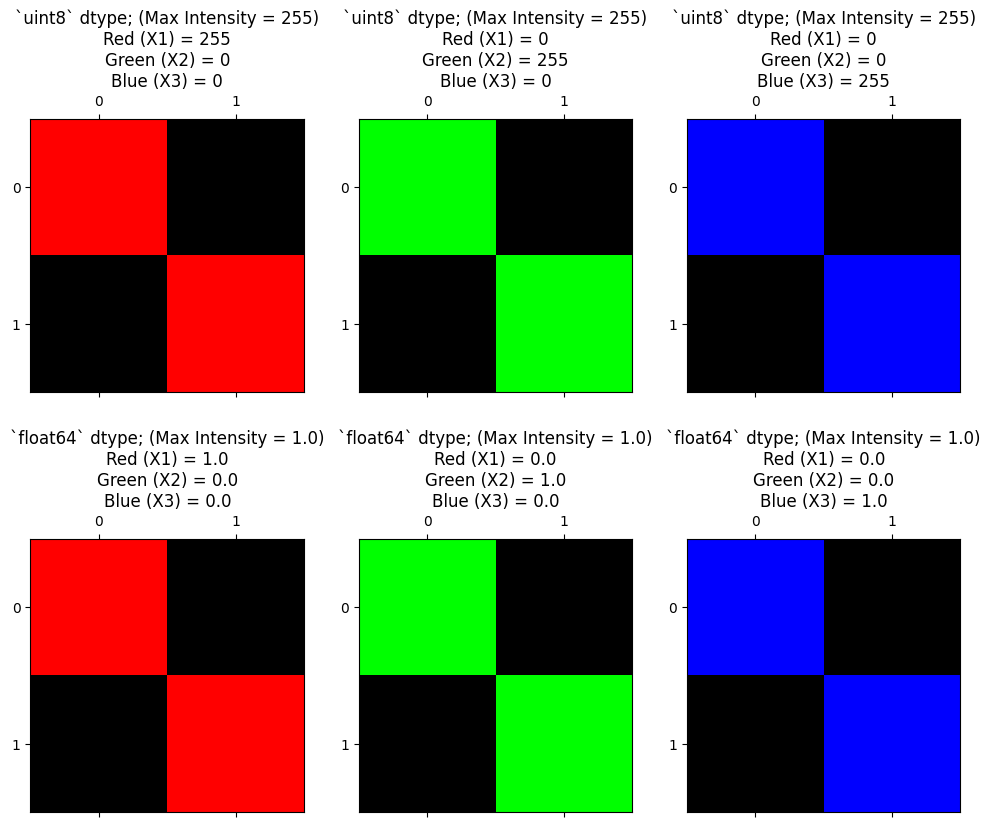

In [48]:
# Use a custom function to plot the maximum intensity values in the diagonals, for `int` and `float` data,
# using our familiar 1's and 0's array.
from random_colours import plot_int_float
plot_int_float();

Ok, now we have clarified the mystical 255 pixel value, let's use a for loop to extract each colour channel of `coffee` image. What do you think Matplotlib will show when we visualise each 2-D slice separately?

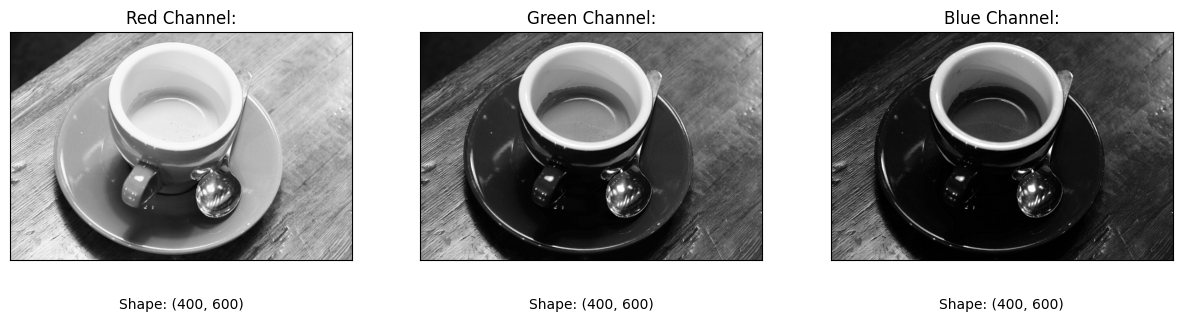

In [49]:
# The name of each colour channel.
RGB_chan_names = ["Red Channel",
                  "Green Channel",
                  "Blue Channel"]

# Loop through, extract each channel as a 2-D slice, and visualise.
plt.figure(figsize=(15, 5))
for i in np.arange(len(RGB_chan_names)):
        chan_name = RGB_chan_names[i]
        plt.subplot(1, 3, i+1)
        current_slice = coffee[:, :, i]
        plt.title(f"{chan_name}:")
        plt.imshow(current_slice)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f"\n\nShape: {current_slice.shape}")

Now we are viewing each slice/colour channel separately, we are again visualising 2-D arrays - you can see the `.shape` of each slice below each image. 

The image from each colour channel, when visualised separately, is now essentially a single-channel image, and so Matplotlib is rendering it in greyscale. As we know, we could also use the `viridis` colourmap to pseudocolour the greyscale information for the images for the purposes of the display (though in this instance, this results in some slightly queasy-looking images):

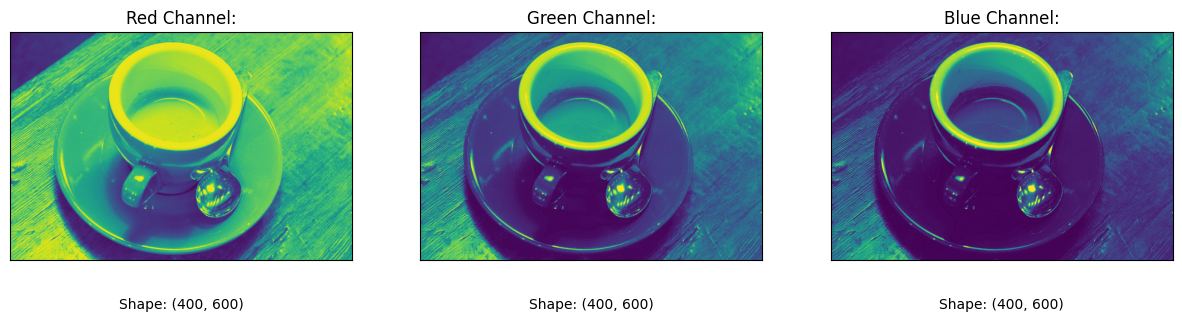

In [50]:
# Pseudo-colour with `viridis`.
plt.figure(figsize=(15, 5))
for i in np.arange(len(RGB_chan_names)):
        chan_name = RGB_chan_names[i]
        plt.subplot(1, 3, i+1)
        current_slice = coffee[:, :, i]
        plt.title(f"{chan_name}:")
        plt.imshow(current_slice, cmap='viridis')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f"\n\nShape: {current_slice.shape}")

When we visualise the full 3-D array however, then, as we have seen, each slice controls the amount of a specific colour, and the resultant mix gives us our beautiful, full colour image:

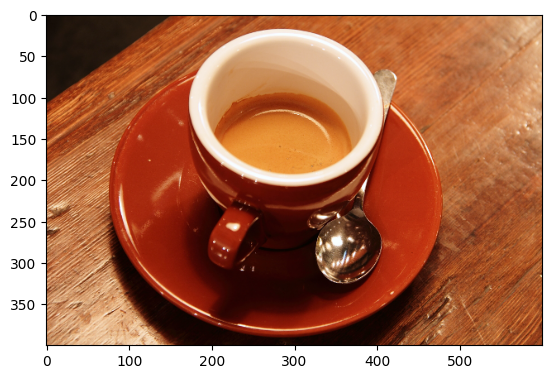

In [51]:
plt.imshow(coffee);

::: {exercise-start}
:label: true-blue
:class: dropdown
:::

Now over to you for some NumPy-fuelled colour wizardry. Your job is take our binary `two_D_ones_and_zeros` array and to use numerical and/or NumPy operations **only** to manipulate the image so that it looks as follows, when displayed with `plt.matshow()`:

![](images/all_blue.png)

An array called `all_blue` contains your raw materials...

In [52]:
# YOUR CODE HERE
all_blue = ...

::: {exercise-end}
:::

::: {solution-start} true-blue
:class: dropdown
:::

The solution here is to `np.stack` a new three-channel array, and  to use some simple NumPy indexing to "turn off" the Red and Green colour channels (e.g. set the pixel values in each slice to 0), and "max out" the Blue colour channel (e.g. set pixel values in the third slice to 1):

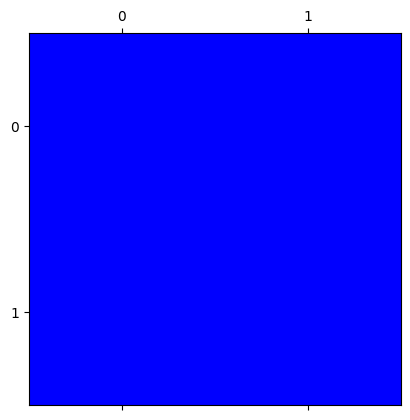

In [53]:
# Copy the original array.
all_blue_solution = two_D_ones_and_zeros.copy()

# Stack the array into 3-D.
all_blue_solution = np.stack([all_blue_solution,
                              all_blue_solution,
                              all_blue_solution],
                              axis=2) 

# "Turn off" the first two colour channels, in all array pixels.
all_blue_solution[:, :, :2] = 0

# "Max out" the Blue colour channel, in all array pixels.
all_blue_solution[:, :, 2] = 1.

# Show the result.
plt.matshow(all_blue_solution);

::: {solution-end}
:::

::: {exercise-start}
:label: blood-smile
:class: dropdown
:::

Time for some more horrifying computer art. Your task now is to modify the `smiley` image from earlier, using only numerical and/or NumPy operations, to make a "blood smiley".

The new "blood smiley" should have a black background, and a red face, meaning that Matplotlib will render it as:

![](images/blood_smile.png)

In [54]:
# YOUR CODE HERE
smiley

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

::: {exercise-end}
:::

::: {solution-start} blood-smile
:class: dropdown
:::

The solution here is simple. The background in the image is already black, meaning that for those pixels, the array pixels values are already 0. When we `np.stack()` the array into 3-D, we just need to set the 1 values (corresponding to the "face" pixels) to 1 the Red channel only. To acheive this, we set all pixels in the Green and Blue channels to be 0.

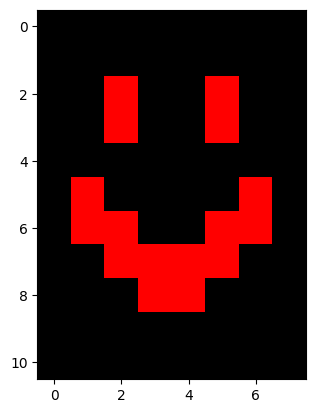

In [55]:
smiley_red_solution = np.stack([smiley * 1, 
                                smiley * 0,
                                smiley * 0], 
                                axis=2)
    
plt.imshow(smiley_red_solution);

::: {solution-end}
:::

::: {exercise-start}
:label: inverted-blood-smile
:class: dropdown
:::

When we "invert" the colour of an image this means we reverse the intensity values. So the highest values become the lowest, and the lowest values become the highest.

Your job is to figure out, again using only numerical or NumPy operations on the `smiley` image, to produce this final result:

![](images/inverted_blood_smiley.png)

In [56]:
# YOUR CODE HERE
inverted_smiley = smiley.copy()

::: {exercise-end}
:::

::: {solution-start} inverted-blood-smile
:class: dropdown
:::

Because `smiley` is a binary array, we can invert the values with a simple numerical operation (subtracting 1 so 0 becomes -1, and 1 becomes 0, then adding 1 to the result so -1 becomes 0 and zero becomes 1).

This inverts our image array:

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


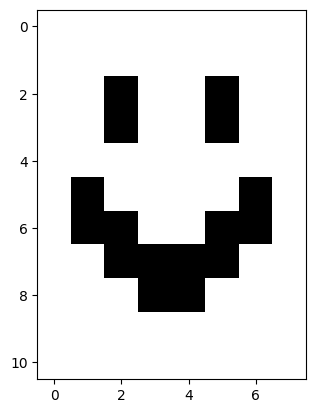

In [57]:
# Step 1 - invert the original array
inverted_smiley_solution = smiley * -1 + 1
print(inverted_smiley_solution)
plt.imshow(inverted_smiley_solution);

We can then stack the inverted array and "turn off" the green and blue channels (by multiplying their pixel values by 0), and "max out" the red channel by multiple its array pixel values by 255:

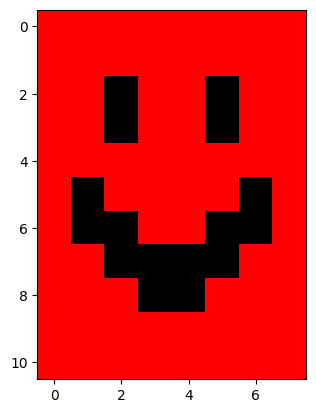

In [58]:
# Step 2 - add the colour channels
inverted_smiley_solution = np.stack([inverted_smiley_solution * 1, 
                                     inverted_smiley_solution * 0,
                                     inverted_smiley_solution * 0], 
                                     axis=2)

plt.imshow(inverted_smiley_solution);

::: {solution-end}
:::

::: {exercise-start}
:label: colourless-caffeine
:class: dropdown
:::

Ok, that was all scary. Now we need a coffee to relax. Your next task is to take the `coffee` image and use only numerical or NumPy operations to convert it to a single-channel (e.g. monochrome image).

In [59]:
# YOUR CODE HERE
colourless_coffee = coffee.copy()

::: {exercise-end}
:::

::: {solution-start} colourless-caffeine
:class: dropdown
:::

There are several ways to do this. One way is to use the `.mean()` method of the `coffee` NumPy array, setting `axis=2` to average across the colour channels in the third dimension. 

The resulting output is 2-D, and therefore single-channel/monochrome:

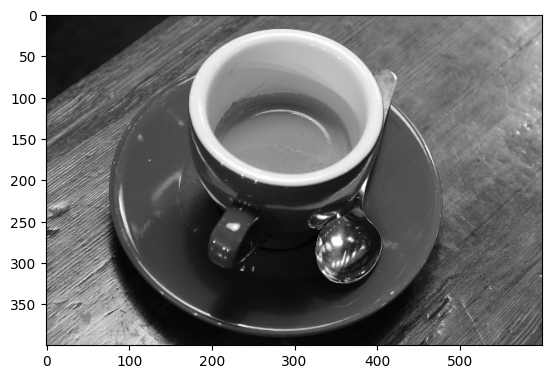

In [60]:
# Solution 1
colourless_coffee_solution = coffee.mean(axis=2)

plt.imshow(colourless_coffee_solution);

Another way is just to use NumPy indexing to extract one colour channel slice:

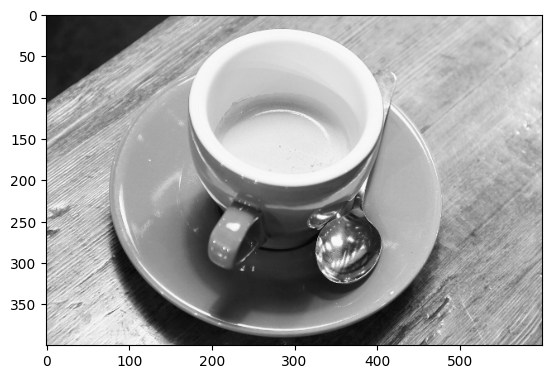

In [61]:
# Solution 2
colourless_coffee_solution = coffee.copy()[:, :, 0]

plt.imshow(colourless_coffee_solution);

Because the intensity values are different in each colour channel slice, the slice we choose will change the resulting image:

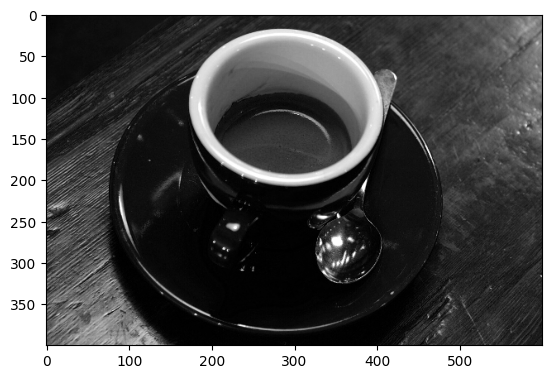

In [62]:
# Use a different slice.
colourless_coffee_solution = coffee.copy()[:, :, 2]

plt.imshow(colourless_coffee_solution);

...we will allow any slice however, as they are all greyscale.

::: {solution-end}
:::

::: {exercise-start}
:label: corrupted-camera
:class: dropdown
:::

In image processing "signal" can very roughly be thought of as a meaningful visual representation of something in pixel values. Conversely, noise can be thought of as meaningless randomness in pixel values. 

Your job now, like an aging memory card or broken file system, is to corrupt the `camera` image with some noisy pixels.

Here is the original image:

![](images/camera_plot.png)

You should use NumPy and numerical operations only, to create the following image:

![](images/corrupted_camera.png)

*Hint 1*: this sort of noise is *random*, you can think about functions in the `np.random` module which might be of use here...

*Hint 2*: to work out what values should random, it may help to pay attention to the colour of the noisy region...

*Hint 3*: run the function `hint_corrupted_camera()` for additional help...

In [63]:
# Import the camera image.
camera = io.imread("images/camera.png")

# Show the attributes of `camera`/
show_attributes(camera)

# YOUR CODE HERE

Type: <class 'numpy.ndarray'>
dtype: uint8
Shape: (512, 512)
Max Pixel Value: 255
Min Pixel Value: 0


::: {exercise-end}
:::

::: {solution-start} corrupted-camera
:class: dropdown
:::

The way we did this was by stacking `camera` into a 3-D array. We then used NumPy indexing to isolate a region around the cameraman's face in the green colour channel (second slice). We used the `np.random.permutation()` function to shuffle (e.g. randomize) the pixel values in this region:

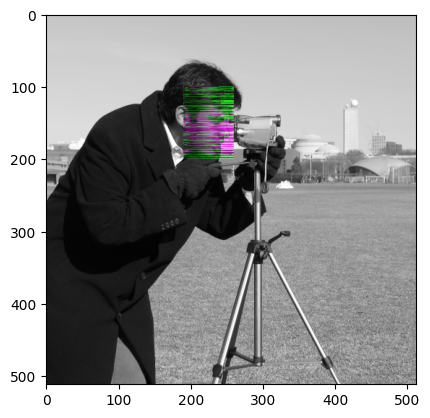

In [64]:
# Solution.
camera_3d = np.stack([camera, 
                      camera,
                      camera], 
                      axis=2)
camera_3d[100:200, 190:260, 1] = np.random.permutation(camera_3d[100:200, 190:260, 1])
plt.imshow(camera_3d);

::: {solution-end}
:::

# More (actually) complex images

So far we have looked at simple images (2-D binary and greyscale low-resolution image arrays, like `smiley`), or colour images with three colour channels (like `coffee`). However, the principles we have seen extend to more complex images, like the image arrays generated by [brain imaging](https://en.wikipedia.org/wiki/Neuroimaging), for instance.

Here is an image of one "slice" of one of the authors brains, which was captured by an [magnetic resonance imaging](https://en.wikipedia.org/wiki/Magnetic_resonance_imaging) scanner:

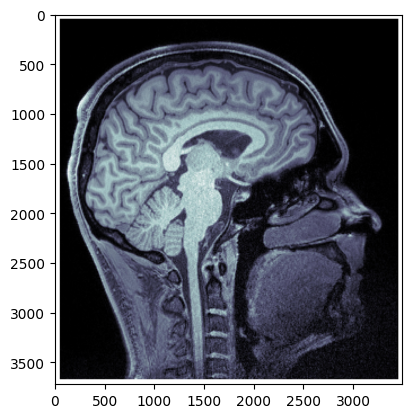

In [65]:
# One author's own brain (a 2-D slice).
brain = io.imread("images/pxr_brain.png")

plt.imshow(brain);

The physics of magnetic resonance imaging are very complex, but the image arrays that it produces, as with our very simple low-resolution arrays, are nothing but arrays of numbers:

In [66]:
# Show the attributes of the brain image.
show_attributes(brain)

Type: <class 'numpy.ndarray'>
dtype: uint8
Shape: (3720, 3493, 4)
Max Pixel Value: 255
Min Pixel Value: 0


This is actually a relatively simple brain image, others can be 4-D (also containing *time* information). However, all of these can still be represented as NumPy arrays, with varying dimensionalities and min/max pixel value conventions.

# Summary

On this page we have seen how colour is represented in NumPy array images:

* Images are (at least) two-dimensional arrays of numbers. Multiple `dtype`s in image arrays are supported by Sci-kit image.

* The number at each location in an image array determines the grey-level (in a 2-D array) or colour (in a 3-D array) of that location when the image is displayed. For 3-D colour arrays the number in each slice/channel is summed to determine the colour in the 2-D displayed image.

* These principles apply both to very simple and very complex images.

On the [next page](2_skimage_intro) we will formally introduce Scikit-image, which uses NumPy image arrays as its fundamental representation of images.

# References

Adapted from: https://lectures.scientific-python.org/advanced/image_processing

Adapted from: https://lectures.scientific-python.org/packages/scikit-image/index.html 

**Reference**: inspiration from Nipraxis also re: arrays/images.

**Reference**: inspiration from `skimage` tutorials

**Reference**: https://bic-berkeley.github.io/psych-214-fall-2016/arrays_and_images.html